In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Metodo de Iterativo

**Ajustando una recta**

In [2]:
##Datos
datos=np.array([0,2,4,7,10,14,27])
x=np.array([i for i in range(len(datos))])

##funcion para el error cuadratico
Error=lambda xr,xp: np.mean(pow(xr-xp,2))

##funcion que se va a ajustar
funcion=lambda x,w: -0.96+w*x

10.848457142857146


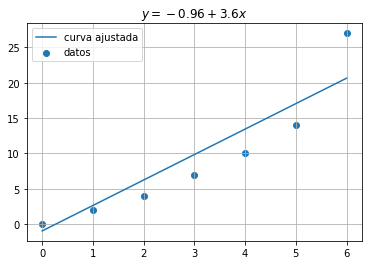

In [3]:
h=1/5 #paso
w=0

##Optimizacion de w
def condicion(datos,Error,funcion,x,w,h):
  return Error(datos,funcion(x,(w+h)))<Error(datos,funcion(x,w))
while True:
  if condicion(datos,Error,funcion,x,w,h):#Comprueba si se puede hacer un paso adelante
    w+=h
    continue
  if condicion(datos,Error,funcion,x,w,-h):#comprueba si se puede hacer un paso hacia atras
    w-=h
    continue
  break

##grafica de la funcion optimizada y de los datos
plt.scatter(x,datos,label="datos")
plt.plot(x,funcion(x,w),label="curva ajustada")
plt.title("$y={}+{}x$".format(-0.96,round(w,2)))
plt.legend()
plt.grid()
print(Error(datos,funcion(x,w)))

#Perceptron simple

Las neuronas por si solas pueden resolver problemas lineales, retomando el ejemplo anterior:

Se tomará una neurona con una sola entrada a la cual se va a ajustar los pesos para retornar los valores con menor error para los datos dados.

recordemos que:
$$y=f(W\times X)$$

Las entradas se dan con arreglos que dan una estructura tal que el corchete de primer nivel hace referencia al conjunto de entradas de la neurona:
$$[[x_{11},x_{12}],[x_{21},x_{22}],[x_{13},x_{23}]]$$

Los corchetes de segundo nivel hacen referencia a las entradas:
$$[x_{11},x_{12}]$$

Luego los elementos dentro de este corchete de segundo nivel son las entradas:
$$x_{11}$$
De forma que los que coincidan en el segundo sub-Indice pertenecen a la misma salida $Y$

**Clase padre**

In [6]:
##Esta clase no hace nada, funciona solo como base para las neuronas funcionales
class INeurona:
  def __init__(self,N,funcion=(lambda x: x, lambda x:x**0),f_Error=(lambda yr, yp: np.mean(pow(yp-yr,2)), lambda yr,yp: 2*(yp-yr))):
    ##La primera funcion de error es una medicion para el programador, 
    #la segunda se utiliza para poder optimizar con algebra matricial a la neurona
    self.w=(np.random.rand(N+1)-0.5)*10
    self.funcion=funcion
    self.f_Error=f_Error
  def _X(x):
    s=[np.ones(len(x[0]))]
    for i in x:
      s.append(i)
    return np.array(s)
  def _predict(self,x):
    return np.array(self.w) @ INeurona._X(x)

  def predict(self,x):
    return self.funcion[0](self._predict(x))

  def error(self,x,Y):
    return self.f_Error[0](Y,self.predict(x))

**Método iterativo**

In [7]:
class Neurona(INeurona):
  def optimiza(self,x,Y,h,i):
    temp=[j for j in self.w]
    temp[i]+=h
    if self.f_Error[0](Y,self.funcion[0](np.array(temp)@Neurona._X(x)))<self.f_Error[0](Y,self.predict(x)):
      self.w[i]+=h
      return True
    return False

  def train(self,x,Y,ciclos=10,h=1/10):
    for _ in range(ciclos):
      for i in reversed(range(len(self.w))):
        while True:
          if (self.optimiza(x,Y,h,i)):
            continue
          if (self.optimiza(x,Y,-h,i)):
            continue
          break
    return self.error(x,Y)

**Metodo por descenso del gradiente**

In [8]:
class Neurona_G(INeurona):
  def dEds(self,x,Y):
    dfds=self.funcion[1](self._predict(x))
    return np.array([self.f_Error[1](Y,self.predict(x))*dfds])#(nx,)-> actúa como (1,nx) o (nx,1) dependiendo del uso
  def train(self,x,Y,ciclos=10,h=1/10):
    X=Neurona._X(x)#(nx,nw)
    for _ in range(ciclos):
      self.w-=h*(self.dEds(x,Y)@X.T)[0]#((nx,)@(nx,nw))=(nw,)
    return self.f_Error[0](Y,self.predict(x))
      

**Ejemplos de uso**

**Prediccion**

In [9]:
##Datos
datos=np.array([0,2,4,7,10,14,17])
x=np.array([i for i in range(len(datos))])

In [10]:
##info
def info(neurona,x,datos):
  print("pesos:\t",neurona.w)
  print("prediccion:\t",neurona.predict(x))
  print("Y real:\t",datos)
  print("X:\t",x)
  print("Error\t",neurona.error(x,datos))

pesos:	 [-0.96657449  2.89360192]
prediccion:	 [-0.96657449  1.92702743  4.82062935  7.71423127 10.60783319 13.50143511
 16.39503704]
Y real:	 [ 0  2  4  7 10 14 17]
X:	 [array([0, 1, 2, 3, 4, 5, 6])]
Error	 0.4438797727621265


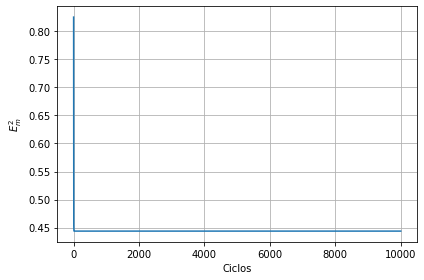

In [11]:
neurona=Neurona(1)
E=[]
for i in range(10000):
  E.append(neurona.train([x],datos,h=1e-3,ciclos=1))
info(neurona,[x],datos)


plt.plot(range(len(E)), E)
plt.grid()
plt.xlabel("Ciclos")
plt.ylabel("$E^2_m$")
plt.tight_layout()

pesos:	 [-0.96428571  2.89285714]
prediccion:	 [-0.96428571  1.92857143  4.82142857  7.71428571 10.60714286 13.5
 16.39285714]
Y real:	 [ 0  2  4  7 10 14 17]
X:	 [array([0, 1, 2, 3, 4, 5, 6])]
Error	 0.4438775510204081


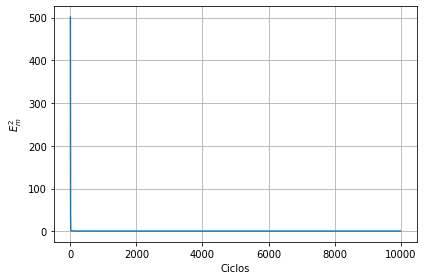

In [ ]:
#ajuste de una recta sobre unos datos
neurona=Neurona_G(1)
E=[]
for i in range(10000):
  E.append(neurona.train([x],datos,h=1e-3,ciclos=1))
info(neurona,[x],datos)

plt.plot(range(len(E)), E)
plt.grid()
plt.xlabel("Ciclos")
plt.ylabel("$E^2_m$")
plt.tight_layout()

**Funciones de activacion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


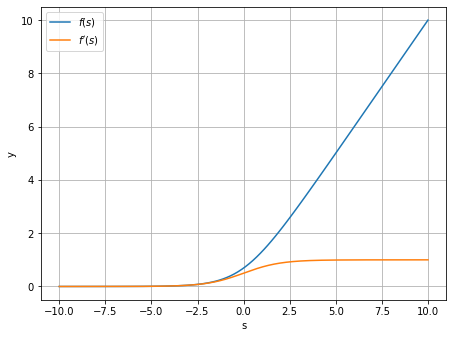

In [ ]:
identidad=(
            lambda x: x,
            lambda x: x**0
            )
sigmoide=(
            lambda x: 1/(1+pow(np.e,-x)),
            lambda x: (1/(1+pow(np.e,-x)))*(1-(1/(1+pow(np.e,-x))))
            )
tanh=(
            lambda x: np.tanh(x),
            lambda x: 1/(pow(np.cosh(x),2))
            )
ReLu=(
            lambda x: np.maximum(x,0),
            lambda x: np.maximum(x,0)/x
            )
softplus=(
    lambda x: np.log(1+pow(np.e,x)),
    lambda x: sigmoide[0](x)
)
#grafica
fun=softplus

fig, ax = plt.subplots(figsize=(6.4, 4.8), constrained_layout=True)
ax.plot(np.linspace(-10,10,100),fun[0](np.linspace(-10,10,100)),label="$f (s)$")
ax.plot(np.linspace(-10,10,1000),fun[1](np.linspace(-10,10,1000)),label="$f' (s)$")
ax.legend()
ax.set_xlabel("s")
ax.set_ylabel("y")
plt.grid()
plt.tight_layout()
plt.savefig("softplus.pdf")

**Ejemplo**

pesos:	 [-7.41007084  4.87614231  4.87613556]
prediccion:	 [6.04761866e-04 7.35131685e-02 7.35136278e-02 9.12312804e-01]
Y real:	 [0, 0, 0, 1]
X:	 [[0, 0, 1, 1], [0, 1, 0, 1]]
Error	 0.004624462369362894


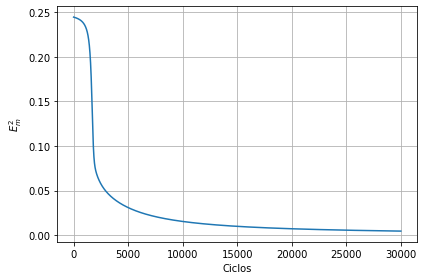

In [ ]:
#neurona que hace un operador and
X=[[0,0,1,1],[0,1,0,1]]
Y=[0,0,0,1]

AND=Neurona_G(2,funcion=sigmoide)
E=[]
for i in range(30000):
  E.append(AND.train(X,Y,h=1/100,ciclos=1))

plt.plot(range(len(E)), E)
plt.grid()
plt.xlabel("Ciclos")
plt.ylabel("$E^2_m$")
plt.tight_layout()
plt.savefig("Cambio del error_G.pdf",dpi=300)


info(AND,X,Y)

**Clasificacion**

Un perceptron puede funcionar como clasificador al separar los datos mediante una funcion

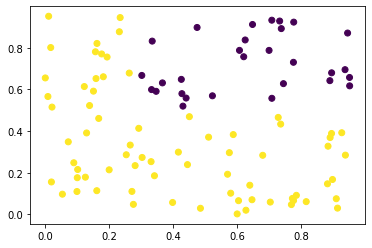

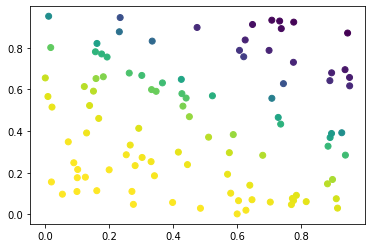

In [ ]:
X=[np.random.rand(100),np.random.rand(100)]
Y=[(1 if X[0][i]<.3 or X[1][i]<.5 else 0) for i in range(100)]
plt.scatter(X[0],X[1], c=Y)
plt.show()


neurona=Neurona_G(2, funcion=sigmoide)
neurona.train(X,Y, h=1/100,ciclos=10000)

Yp=neurona.predict(X)

plt.scatter(X[0],X[1], c=Yp)
plt.show()

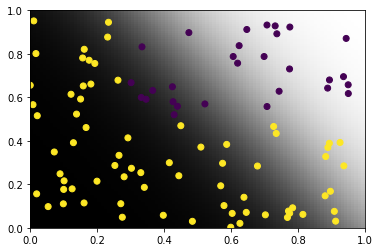

In [ ]:
X__=[np.linspace(0,1,100),np.linspace(0,1,100)]
Y__=[[neurona.predict([[x0],[x1]])[0] for x0 in X__[0]] for x1 in X__[1]]
Y__=np.array(Y__)
plt.pcolormesh(X__[0],X__[1],Y__.T,cmap="binary")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(X[0],X[1], c=Y)
plt.show()

#Red neuronal

In [ ]:
class IRed_Neuronal:
  def __init__(self,n_entradas,n_neuronas_PC, funciones, f_Error=(lambda yr, yp: np.mean(pow(yp-yr,2)), lambda yr,yp: 2*(yp-yr)),NeuronaC=Neurona_G):
    self.f_Error=f_Error
    self.capas=[]
    self.funciones=funciones
    for i in range(len(n_neuronas_PC)):
      self.capas.append([])
      for _ in range(n_neuronas_PC[i]):
        self.capas[-1].append(NeuronaC((n_entradas if i==0 else len(self.capas[-2])),funciones[i], f_Error))

  def calcular(self,x):
    y=[x]
    dy=[None]
    for i,capa in enumerate(self.capas):
      y.append([])
      dy.append([])
      for neur in capa:
        y[-1].append(neur.predict(y[-2]))
        dy[-1].append(neur.funcion[1](neur._predict(y[-2])))
      y[-1]=np.array(y[-1])
      dy[-1]=np.array(dy[-1])
    return np.array(y),np.array(dy)

  def predict(self,x):
    return self.calcular(x)[0][-1]

In [ ]:
class Red_Neuronal(IRed_Neuronal):
  def train(self,x,Y,h=1/100, ciclos=10):
    for _ in range(ciclos):
      #pass forward
      a,da=self.calcular(x)#(n_n-1,n,n_x),(n_l-1,n,n_x)
      deltas=[]
      #backward pass
      for n,capa in enumerate(reversed(self.capas)):
        #Calculo de dE/dzln
        if n==0:
          deltas.append(self.f_Error[1](np.array(Y),a[-1])*da[-1])
        else:
          deltas.append((deltas[-1].T@np.array([neur.w[1:] for neur in self.capas[-n]])).T*da[-1-n])
        #Calculo de las nuevas w y b
        _w=np.array([neur.w[1:] for neur in self.capas[-1-n]])-h*deltas[-1]@np.array(a[-2-n]).T
        _b=np.array([neur.w[0] for neur in self.capas[-1-n]])-h*np.mean(deltas[-1],axis=1)
        #asignacion de w y b
        for m,neur in enumerate(capa):
          neur.w[1:]=_w[m]
          neur.w[0]=_b[m]
        ''' 
          #Este segmento es una version de prueba de la de arriba, aunque no funciona mal
        _w=np.array([neur.w for neur in self.capas[-1-n]])-h*deltas[-1]@(Neurona._X(a[-2-n]) if n<len(self.capas) else np.array(a[-2-n]).T)

        for m,neur in enumerate(capa):
          neur.w=_w[m]
        '''
    E=self.f_Error[0](np.array(Y),a[-1])
    return E

**Prediccion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


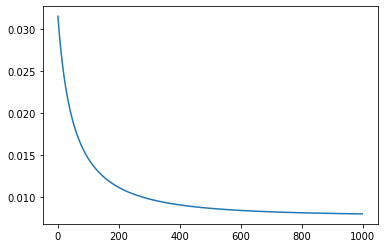

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


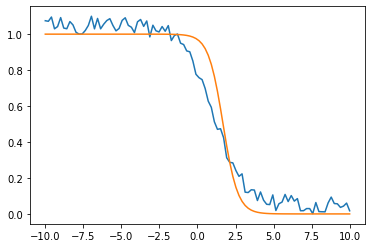

In [ ]:
X=[np.linspace(-10,10,100)]
Y=sigmoide[0](-X[0]+1)+np.random.rand(len(X[0]))/10
RN=Red_Neuronal(1,[1],[sigmoide])
E=[]
for i in range(1000):
  E.append(RN.train(X,Y,h=1/1000,ciclos=1))

plt.plot(range(len(E)), E)
plt.show()
plt.plot(X[0],Y)
plt.plot(X[0],RN.predict(X)[0])

**Clasificacion**

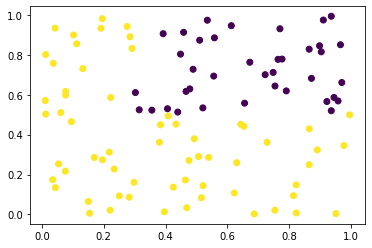

In [ ]:
X=[np.random.rand(100),np.random.rand(100)]
Y=[(1 if X[0][i]<.3 or X[1][i]<.5 else 0) for i in range(100)]
X=np.array(X)
Y=np.array(Y)[:, np.newaxis].T
E=np.infty
plt.scatter(X[0],X[1], c=Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


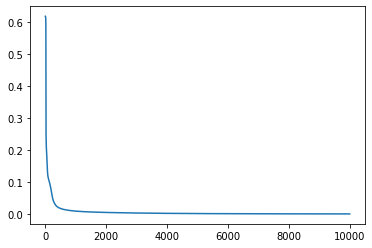

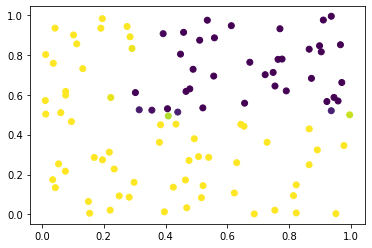

In [ ]:
RN=Red_Neuronal(2,[10,15,10,1],[sigmoide, sigmoide, sigmoide,sigmoide])
E=[]
for i in range(10000):
  E.append(RN.train(X,Y,h=1/100,ciclos=1))
plt.plot(range(len(E)),E)
plt.show()
Yp=RN.predict(X)[0]
plt.scatter(X[0],X[1], c=Yp)
plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


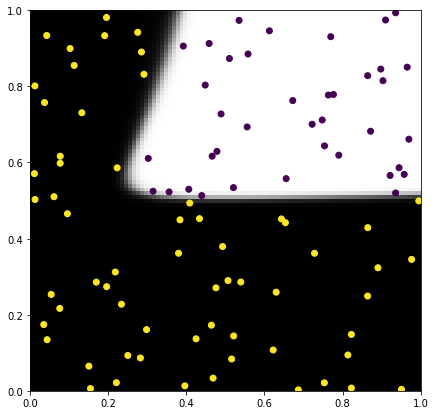

In [ ]:
X__=[np.linspace(0,1,100),np.linspace(0,1,100)]
Y__=[[RN.predict([[x0],[x1]])[0][0] for x0 in X__[0]] for x1 in X__[1]]
Y__=np.array(Y__)
plt.figure(figsize=(7,7))
plt.pcolormesh(X__[0],X__[1],Y__,cmap="binary")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(X[0],X[1], c=Y)
plt.show()